<a href="https://colab.research.google.com/github/luizmarcossilvacosta/template_portfolio/blob/main/ANALISERIOVIOLENCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANALISANDO OS DADOS SOBRE A VIOLÊNCIA NO RIO DE JANEIRO

O estado do Rio de Janeiro vem há decadas perdendo participação na economia nacional e claro isso reflete nos indicadores sociais com conseguente incremento da violênica de um modo geral. A cidade do Rio de Janeiro, a maior do estado, neste contexto também sofre com a violência social, lembrando que o estado do Rio tem mais de 90% da população vivendo em região urbana. A Cidade Maravilhosa, e de fato o é, convive com sua beleza e luta contra a violência.

<center><img alt="Rio de Janeiro" width="50%" src="http://riofan.com.br/wp-content/uploads/2018/10/estatua-cristo-redentor-rj.jpg"></center>



O estudo apresentado a seguir busca analisar os indicadores desta violência considerando os dados de 1991 até 2019.








## Obtenção dos dados

Os dados foram obtidos no site oficial do Instituto de Segurança Pública do Estado do Rio de Janeiro:
*   http://www.ispdados.rj.gov.br/estatistica.html

O arquivo `csv` disponibilizado foi pré-processado incialmente por Carlos Melo e encontra-se disponível em:

*   https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv










### Importando os dados.

Lendo o arquivo `csv` com `df = pd.read_csv`.

In [1]:
# Importando a biblioteca Pandas

import pandas as pd
RIO_VIOLENCIA = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv"

df = pd.read_csv (RIO_VIOLENCIA)

## Análise Incial dos dados

  O arquivo de dados analisado apresenta algumas caracteristicas que são apresentadas inicialmente:



In [2]:
# VERIFICNADO O TAMANHO DO ARQUIVO.
df.shape
print('Número de linhas',df.shape[0])
print('Número de colunas',df.shape[1])

Número de linhas 344
Número de colunas 56


 * O arquivo analisado apresenta 344 linhas e 56 colunas, ou seja, 56 colunas representando o números de variáveis. Verificaremos a seguir os nomes dado às variáveis e o tipo das variáveis

In [3]:
# VERIFICANDO O NOME DAS VARIÁVEIS
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind



*   Observamos acima os nomes dados as variáves identificadas pela SSP-RJ. 


In [4]:
# VERIFICANDO O TIPO DE VARIÁVEL
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

*  Todas variáveis são numéricas, e as 5 primeiras linhas e as 5 últimas do arquivo são apresntadas a seguir. Cada linha representa um mês dos anos analisados e para cada mês são apresentados 56 valores para as 56 variáveis. Tais verificações auxiliam no conhecimento do arquivo de dados.

In [5]:
# VERIFICANDO AS CINCO PRIMEIRAS LINHAS DO ARQUIVO DE DADOS

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [6]:
# VERIFICANDO AS CINCO ÚLTIMAS LINHAS DO ARQUIVO DE DADOS

df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


* Outra verificação incial é o percentual de valores ausentes para as variáves. É comum nos arquivos de dados que alguns valores ou todos os valores de algumas variáveis não são apresentados. São vários os motivos e ter consciência de quantos e quais variáveis é de grande relevância. Verifica-se abaixo que a campeã neste quesito, considerando-se todo o periódo de 1991 a 2019, é a variável que quantifica o roubo de bicicletas,`roubo_bicicleta` com 80,23% de valores ausentes.

## Informações estatística da violência no Rio de Janeiro

Em grandes cidades, concentrações urbanas que agregam capitais e cidades vizinhas, verifica-se em todo país o aumento da violência urbana em tais concentrações devido a diversos fatores. Os dados disponibilizados, pela SSP-RJ, para a cidade do Rio de Janeiro procuram retratar de forma oficial informações reais sobre o tema. A análise e interpretação destes dados requer elaboração de históricos, comparações de evolução ou involução de indicadores, elaboração e análise de gráficos e por vezes comparaçãoes com outros indicadores sócio-econômicos são de considerável importância. Toda esta análise dos dados de um modo em geral é realizada pelo tratamento estatístico, tratamento este que busca resumir, caracterizar, relativizar, estimar e validar informações que podem ser obtidas e traduzidas nestes dados. O que se apresenta abaixo é um resumo estatístico dos dados.

In [7]:
# RESUMO ESTATÍSTICO DOS DADOS
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Observação Incial sobre a disposição dos dados

   Na descrição geral dos dados é possível verificar, por exemplo, que houveram em média por mês no período aproximadamente 504 homicídios dolosos, `hom_doloso = 504.555233`. Outra verificação importante é relativa à discretização do período de análise. Embora o index, a coluna contadora, apresente-se por numeração de 0 a 343, como verifica-se pelos comandos, `df.head()`e `df.tail()` acima, há quase que uma estraficação natural, separação dos dados, que pode ser feita pelos anos das ocorrências, ou seja, os dados serão estratificados na variável `vano`, e podem ser agrupados por anos. Tal agrupamento poderá mostrar caracteristicas adicionais em relação à consideração dos dados de 1991 até 2019 enriquecendo mais a análise. Após a análise inicial para comparação será analisado isoladamente os anos de 1991, 2000 e 2019, que apresentam um intervalo entre eles de nove anos.

### Consideração às ocorrências relativas a véiculos
   Uma verificação útil é avaliação do indíce de veículos recuperados,`recuperacao_veiculos`, diante do montante de veículos furtados,`furto_veiculos` mais o montante de veículos roubados.`roubo_veiculo`. Tal indíce será avaliado com base na soma das ocorrências de cada uma das variáveis. O número médio de ocorrências mensais para cada uma das variáveis também é observado.

In [8]:
# DADOS MÉDIOS MENSAIS PARA AS OCORRÊNCIAS RELATIVAS AOS VÉICULOS
    #roubo_veiculo
    #furto_veiculos
    #recuperacao_veiculos
rvm = df.roubo_veiculo.mean()
fvm = df.furto_veiculos.mean()
recvm = df.recuperacao_veiculos.mean()
print('Sobre veículos:')
print('número médio de roubo de veiculos =',rvm)
print('número médio de furto de veiculos =',fvm)
print('número médio de veículos recuperados =',recvm)

Sobre veículos:
número médio de roubo de veiculos = 2448.6976744186045
número médio de furto de veiculos = 1674.671511627907
número médio de veículos recuperados = 1772.2383720930231


In [9]:
# CALCULANDO O PERCENTUAL DE CARROS RECUPERADOS EM RELAÇÃO AO TOTAL DE CARROS ROUBADOS E FURTADOS:
A = df.roubo_veiculo.sum() 
B = df.furto_veiculos.sum()
C = df.recuperacao_veiculos.sum()
print('tot. veículos roubados =', A)
print('tot. veículos furtados =', B)
print('tot. veículos recuperados =', C)
#print(A, '   ',B,'   ',C)
INDICE_RECUP = C/(A+B)
print('Indice de veículos recuperados =', INDICE_RECUP)

tot. veículos roubados = 842352
tot. veículos furtados = 576087
tot. veículos recuperados = 609650
Indice de veículos recuperados = 0.42980346705075084


A média mensal de veículos furtados e roubados são valores bem significativos. Observa-se que em relação aos veículos furtados e roubados, apenas *42,98 %* destes veículos foram recuperados.

### Visualização dos Dados

A análise de um conjuntos de dados pode e deve ter de forma acessória de análise: a elaboração de gráficos de diversos formatos. Histogramas de frequência, gráfico de setores, barras e colunas, de linha, pictogramas e gráficos de dispersão, entre outros, são úteis pois apresentam o poder de síntese e rapidez na veinculação da informação e auxiliam fortemente na análise qualitativa dos dados.

Serão apresentados a seguir dois gráficos:


*   Um Histograma de frequência para a variável `hom_doloso`.
*  Um gráfico de linha para a variável `roubo_em_coletivo`.
*  Um gráfico de dispersão entre as variáveis `roubo_comercio` e `roubo_residencia`.



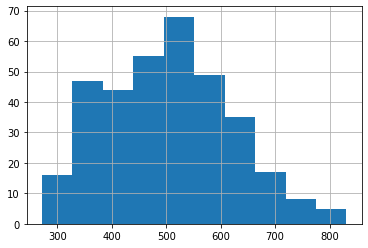

In [10]:
# HISTROGRAMA DE FREQUÊNCIA

df.hom_doloso.hist();


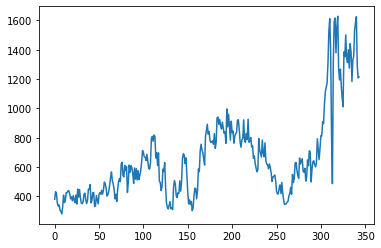

In [11]:
# GRÁFICO DE LINHA - ROUBO EM COLETIVO

df.roubo_em_coletivo.plot();

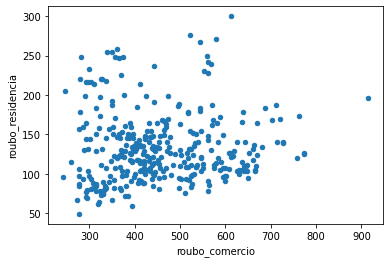

In [12]:
df.plot.scatter("roubo_comercio","roubo_residencia");

#### Análise dos gráficos

O histograma de frequência apresenta-se a maior frequência, número de ocorrências, entre 500 e 550 ocorrências, o que vai de encontro à média aritimética obtida que foi em torno de 504 ocorrências de homicídio doloso. A análise do gráfico de linhas, relativo ao roubo em coletivos, mostrou um tendência de alta no número de roubos. Chama a atenção, após a tricentésimo mês ocorreu um queda pontual no número de ocorrencias em um mês específico. O gráfico de dispersão demonstra que não há alguma relação entre os roubos ocorridos em residências e os ocorridos em estabelecimentos comerciais.

### Verificação dos Homicídos Dolosos.

Com relação ao homicídios dolosos pôde-se verificar o maior e menor número de ocorrências registrados em um mês, e além disso identificar cada mês das ocorrências citadas.

In [13]:
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()
print('Maior número de homícidios dolosos em um mês = ', max_hom_doloso)
print('')
print('Menor número de homícidios dolosos em um mês = ', min_hom_doloso)

Maior número de homícidios dolosos em um mês =  831

Menor número de homícidios dolosos em um mês =  272


In [14]:
df[df.hom_doloso == 831]


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Observamos aqui o mês com maior ocrrência de homicídios dolosos foi janeiro de 1995, e que o com menor número de ocorrências foi junho de 2015.

In [15]:
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


Os dados apresentados mostram que a menor ocorrência mensal de homicídios dolosos foi em 2015, quando foram registrados 272 homícidos. Em janeiro de 1995 foi registrado o maior número de ocorrências com 831 homicídios dolosos.

## Estratificação dos dados.

   Na análise incial dos dados observou-se que uma estatrificação  natural seria agrupar os dados pelos anos, ou seja, agrupar os dados de 1991, os doados de 1992 e assim sucessivamente até o último ano de análise que foi 2019. O conjunto de dados original apresenta como `ìndex` ou coluna contadora números de 0 a 343 representando cada mês em que os valores das variáveis foram obtidas. Assim a linha indexada como 0 representa o primeiro mês de 1991 e desta forma até o último mês de 2019, último ano apresentado no aquivo disponibilizado.

   Uma estratificação a ser realizada será a de criar novos `dataframes` separados da seguinte forma:


1.   O primeiro considerando como `index`a variável `vano`.
2.   Um apresentando somente dados do ano de 1991.
3.   Um apresentando somente dados do ano de 2000.
4.   Um apresentando somente dados do ano de 2019.

Em seguida são realizadas algumas da diversas comparações posséveis decorrentes desta estratificação.



## Apresentando um novo conjunto de dados

Os dados abaixo apresentam como coluna indexadora a váriável `vano`. Inicalmente verificou-se, logo no início da análise, `df.head()` e `df.tail()`, na coluna indexadora, que é a primeira coluna dos dados, numeração de 0 até 343 referente ao número de meses do período de análise. A alteração desta indexação de número para anos será de grande utilidade para a análise.

In [16]:
# CRIANDO UM NOVO DATAFREME INDEX = ANO.

dfano = pd.read_csv(RIO_VIOLENCIA, index_col = 'vano')

dfano.head()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [17]:
dfano.shape

(344, 55)

Agora verificamos que a primeira coluna apresenta os anos considerados no período de análise e claro tem-se 55 colunas e não mais 56 como era inicialmente no arquivo.

### Dados para o ano de 1991

  Os dados exclusivos para o ano de 1991 foram extraídos para estudo dos dados neste ano e são apresentados a seguir.

In [18]:
# CONSIDERANDO O ANO DE 1991
df91 =  dfano.loc[1991]
df91.shape

(12, 55)

Aqui observa-se que os dados para 1991 são apresentados em 12 linhas, ou seja, os 12 meses do ano e 55 colunas representando as 55 variáveis apresentadas no conjunto de dados original.

In [19]:
# DADOS GERAIS DE 1991

df91.describe()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,12.000000,12.000000,0.0,12.000000,0.0,12.000000,12.000000,0.0,0.0,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.0,0.0,0.0,0.0,0.0,12.000000,12.000000,12.000000,12.000000,0.0,0.0,0.0,12.000000,12.000000,0.0,0.0,0.0,0.0,12.000000,0.0,0.0,0.0,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,0.0,0.0,0.0,12.000000,12.000000,12.000000,0.0,12.0
mean,6.500000,626.500000,NaN,17.083333,NaN,187.500000,3254.416667,NaN,NaN,NaN,483.833333,203.416667,1371.000000,85.083333,924.166667,354.083333,28.916667,NaN,NaN,NaN,NaN,NaN,114.833333,3565.333333,1998.250000,912.000000,NaN,NaN,NaN,3524.000000,6434.250000,NaN,NaN,NaN,NaN,155.500000,NaN,NaN,NaN,824.166667,NaN,NaN,NaN,NaN,NaN,NaN,121.583333,NaN,NaN,NaN,643.583333,1278.250000,1371.000000,NaN,3.0
std,3.605551,60.301515,NaN,4.010403,NaN,24.183014,333.050490,NaN,NaN,NaN,76.882240,24.788041,145.687087,24.615067,114.995520,48.737625,9.149847,NaN,NaN,NaN,NaN,NaN,26.044833,283.667005,97.837644,181.003265,NaN,NaN,NaN,115.327202,186.743443,NaN,NaN,NaN,NaN,38.230164,NaN,NaN,NaN,50.952444,NaN,NaN,NaN,NaN,NaN,NaN,55.952022,NaN,NaN,NaN,62.284477,147.691401,145.687087,NaN,0.0
min,1.000000,542.000000,NaN,11.000000,NaN,146.000000,2784.000000,NaN,NaN,NaN,350.000000,171.000000,1097.000000,63.000000,797.000000,281.000000,12.000000,NaN,NaN,NaN,NaN,NaN,81.000000,3261.000000,1835.000000,673.000000,NaN,NaN,NaN,3290.000000,6184.000000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,751.000000,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,561.000000,1086.000000,1097.000000,NaN,3.0
25%,3.750000,572.250000,NaN,14.000000,NaN,171.750000,3044.750000,NaN,NaN,NaN,438.500000,187.500000,1326.500000,71.000000,826.500000,323.000000,24.750000,NaN,NaN,NaN,NaN,NaN,93.000000,3330.000000,1966.000000,776.250000,NaN,NaN,NaN,3504.250000,6268.250000,NaN,NaN,NaN,NaN,131.500000,NaN,NaN,NaN,788.500000,NaN,NaN,NaN,NaN,NaN,NaN,78.750000,NaN,NaN,NaN,585.500000,1149.500000,1326.500000,NaN,3.0
50%,6.500000,636.000000,NaN,16.500000,NaN,200.000000,3172.500000,NaN,NaN,NaN,497.000000,195.000000,1359.500000,82.000000,947.000000,348.000000,28.000000,NaN,NaN,NaN,NaN,NaN,109.500000,3476.000000,1996.000000,873.000000,NaN,NaN,NaN,3562.000000,6468.000000,NaN,NaN,NaN,NaN,160.000000,NaN,NaN,NaN,813.500000,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,NaN,NaN,654.000000,1307.000000,1359.500000,NaN,3.0
75%,9.250000,651.750000,NaN,20.000000,NaN,201.250000,3436.250000,NaN,NaN,NaN,555.000000,228.750000,1454.250000,85.000000,969.750000,388.000000,36.250000,NaN,NaN,NaN,NaN,NaN,133.750000,3768.250000,2050.250000,1063.000000,NaN,NaN,NaN,3601.750000,6535.500000,NaN,NaN,NaN,NaN,180.250000,NaN,NaN,NaN,870.500000,NaN,NaN,NaN,NaN,NaN,NaN,152.000000,NaN,NaN,NaN,670.500000,1385.500000,1454.250000,NaN,3.0
max,12.000000,732.000000,NaN,25.000000,NaN,216.000000,4003.000000,NaN,NaN,NaN,569.000000,242.000000,1600.000000,157.000000,1186.000000,432.000000,43.000000,NaN,NaN,NaN,NaN,NaN,158.000000,4060.000000,2185.000000,1195.000000,NaN,NaN,NaN,3641.000000,6719.000000,NaN,NaN,NaN,NaN,215.000000,NaN,NaN,NaN,905.000000,NaN,NaN,NaN,NaN,NaN,NaN,217.000000,NaN,NaN,NaN,749.000000,1540.000000,1600.000000,NaN,3.0


In [20]:
# APRESENTANDO AS PRIMEIRAS 5 LINHAS DE DF19

df91.head()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [21]:
# VALORES AUSENTES
(df91.isnull().sum()/df91.shape[0]).sort_values(ascending = False)

furto_celular                 1.0
apreensao_drogas_sem_autor    1.0
lesao_corp_culposa            1.0
furto_coletivo                1.0
registro_ocorrencias          1.0
furto_bicicleta               1.0
hom_culposo                   1.0
estupro                       1.0
sequestro                     1.0
extorsao                      1.0
sequestro_relampago           1.0
estelionato                   1.0
roubo_apos_saque              1.0
posse_drogas                  1.0
trafico_drogas                1.0
roubo_conducao_saque          1.0
apf                           1.0
aaapai                        1.0
cmp                           1.0
cmba                          1.0
ameaca                        1.0
pessoas_desaparecidas         1.0
hom_por_interv_policial       1.0
encontro_ossada               1.0
pol_militares_mortos_serv     1.0
pol_civis_mortos_serv         1.0
roubo_celular                 1.0
lesao_corp_morte              1.0
roubo_cx_eletronico           1.0
roubo_biciclet

Aqui observamos que em 1991 houve um grande número de variáveis com 100 % valores ausentes, cujo indíce apresentado acima é igual a 1. 

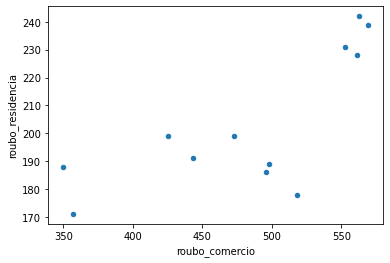

In [22]:
df91.plot.scatter("roubo_comercio","roubo_residencia");

### Dados para o ano de 2000

  Os dados exclusivos para o ano de 2000 foram extraídos para análise dos dados neste ano e são apresentados a seguir.

In [23]:
# CONSIDERANDO O ANO DE 2000
df2000 =  dfano.loc[2000]
df2000.shape

(12, 55)

No ano de 2000 são verificados dados para os 12 meses do ano e apresentadas as 55 variáves para análise.

In [24]:
# VALORES AUSENTES

(df2000.isnull().sum()/df2000.shape[0]).sort_values(ascending = False)

furto_celular                 1.0
apf                           1.0
roubo_conducao_saque          1.0
roubo_apos_saque              1.0
roubo_bicicleta               1.0
furto_coletivo                1.0
furto_bicicleta               1.0
extorsao                      1.0
sequestro_relampago           1.0
estelionato                   1.0
estupro                       1.0
roubo_cx_eletronico           1.0
trafico_drogas                1.0
apreensao_drogas_sem_autor    1.0
posse_drogas                  1.0
pol_militares_mortos_serv     1.0
cmp                           1.0
cmba                          1.0
pessoas_desaparecidas         1.0
encontro_ossada               1.0
aaapai                        1.0
pol_civis_mortos_serv         1.0
roubo_veiculo                 0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
roubo_em_coletivo             0.0
roubo_transeunte              0.0
roubo_carga                   0.0
lesao_corp_dol

Em 2000 ainda há muitas variáveis com 100% de valores ausentes, ou seja, sem nenhuma resposta lançada. Contudo houve uma queda neste númeroem relação à 1991

In [25]:
df2000.describe()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.0,12.000000,0.0,0.0,0.0,12.000000,12.000000,12.000000,12.000000,0.0,0.0,0.0,12.000000,12.000000,12.000000,0.0,0.0,0.0,12.000000,0.0,0.0,0.0,12.000000,0.0,0.0,0.0,0.0,12.000000,0.0,12.000000,0.0,0.0,0.0,12.00000,12.000000,12.000000,12.000000,12.0
mean,6.500000,523.916667,6.583333,16.666667,35.583333,220.083333,5816.416667,NaN,223.166667,5816.416667,447.000000,117.416667,2310.666667,282.583333,1601.583333,692.083333,14.000000,NaN,176.666667,NaN,NaN,NaN,1294.833333,6936.833333,1480.000000,774.916667,NaN,NaN,NaN,5108.250000,7363.166667,0.416667,NaN,NaN,NaN,854.916667,NaN,NaN,NaN,1826.333333,NaN,NaN,NaN,NaN,4101.333333,NaN,87.500000,NaN,NaN,NaN,582.75000,2470.333333,2310.666667,36039.166667,3.0
std,3.605551,40.268324,2.712206,5.331439,9.297686,31.291760,466.936916,NaN,22.622729,466.936916,49.460728,16.030983,236.647929,29.453996,237.052146,115.296817,3.643175,NaN,429.366200,NaN,NaN,NaN,153.718061,388.180800,68.759132,131.788024,NaN,NaN,NaN,375.619035,409.908157,0.514929,NaN,NaN,NaN,98.631046,NaN,NaN,NaN,250.577999,NaN,NaN,NaN,NaN,453.317134,NaN,15.018171,NaN,NaN,NaN,38.78642,302.591033,236.647929,1178.558506,0.0
min,1.000000,448.000000,3.000000,11.000000,22.000000,186.000000,5188.000000,NaN,192.000000,5188.000000,369.000000,94.000000,2043.000000,245.000000,1278.000000,496.000000,8.000000,NaN,0.000000,NaN,NaN,NaN,1065.000000,6283.000000,1362.000000,588.000000,NaN,NaN,NaN,4726.000000,6903.000000,0.000000,NaN,NaN,NaN,715.000000,NaN,NaN,NaN,1188.000000,NaN,NaN,NaN,NaN,3334.000000,NaN,65.000000,NaN,NaN,NaN,501.00000,1911.000000,2043.000000,33870.000000,3.0
25%,3.750000,498.750000,4.750000,12.750000,29.000000,195.250000,5562.000000,NaN,204.250000,5562.000000,418.750000,107.250000,2153.500000,254.500000,1416.500000,627.500000,10.750000,NaN,0.000000,NaN,NaN,NaN,1181.750000,6707.500000,1433.500000,643.500000,NaN,NaN,NaN,4879.250000,7075.750000,0.000000,NaN,NaN,NaN,778.500000,NaN,NaN,NaN,1739.750000,NaN,NaN,NaN,NaN,3817.250000,NaN,78.500000,NaN,NaN,NaN,560.25000,2344.250000,2153.500000,35165.750000,3.0
50%,6.500000,540.000000,6.000000,16.000000,34.500000,205.000000,5743.500000,NaN,220.000000,5743.500000,454.500000,113.000000,2252.500000,276.000000,1589.500000,697.500000,14.000000,NaN,0.000000,NaN,NaN,NaN,1323.500000,6875.000000,1474.500000,766.000000,NaN,NaN,NaN,4972.000000,7367.500000,0.000000,NaN,NaN,NaN,854.500000,NaN,NaN,NaN,1865.000000,NaN,NaN,NaN,NaN,4088.000000,NaN,82.500000,NaN,NaN,NaN,597.50000,2476.500000,2252.500000,35958.500000,3.0
75%,9.250000,547.750000,7.250000,19.000000,43.750000,243.250000,6050.750000,NaN,237.500000,6050.750000,478.750000,129.000000,2342.500000,306.250000,1777.250000,798.000000,17.000000,NaN,0.250000,NaN,NaN,NaN,1422.750000,7098.500000,1518.750000,869.000000,NaN,NaN,NaN,5233.000000,7532.000000,1.000000,NaN,NaN,NaN,894.750000,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,4334.750000,NaN,96.750000,NaN,NaN,NaN,610.00000,2574.250000,2342.500000,37140.500000,3.0
max,12.000000,577.000000,12.000000,28.000000,50.000000,279.000000,6653.000000,NaN,2

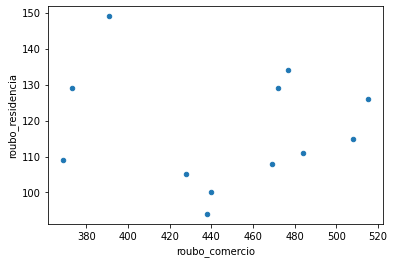

In [26]:
df2000.plot.scatter("roubo_comercio","roubo_residencia");

### Dados para o ano de 2019

  Os dados exlusivos para o ano de 2019 foram extraídos para análise dos dados neste ano e são apresentados a seguir.

In [27]:
# CONSIDERANDO O ANO DE 2019
df19 =  dfano.loc[2019]
df19.shape

(8, 55)

Na estratificação para o ano 2019 observa-se que há apenas 8 linhas, ou seja, não foram apresentados dados para todos os meses deste ano, mas como nos anos anteriores são verificadas 55 colunas relativas às variáveis consideradas.

In [28]:
# VALORES AUSENTES

(df19.isnull().sum()/df19.shape[0]).sort_values(ascending = False)

fase                          0.0
roubo_carga                   0.0
furto_veiculos                0.0
total_roubos                  0.0
outros_roubos                 0.0
roubo_bicicleta               0.0
roubo_apos_saque              0.0
roubo_conducao_saque          0.0
roubo_celular                 0.0
roubo_cx_eletronico           0.0
roubo_banco                   0.0
roubo_em_coletivo             0.0
roubo_transeunte              0.0
roubo_veiculo                 0.0
furto_coletivo                0.0
roubo_residencia              0.0
roubo_comercio                0.0
lesao_corp_culposa            0.0
hom_culposo                   0.0
estupro                       0.0
lesao_corp_dolosa             0.0
tentat_hom                    0.0
hom_por_interv_policial       0.0
latrocinio                    0.0
lesao_corp_morte              0.0
hom_doloso                    0.0
furto_transeunte              0.0
furto_celular                 0.0
registro_ocorrencias          0.0
aaapai        

Embora tenha-se para 2019 dados para menor número de meses, não há variável com valores ausentes.

In [29]:
df19.describe()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,8.00000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.00000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.0000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.00000,8.00000,8.0,8.000000,8.000000,8.00000,8.000000,8.00000
mean,4.50000,339.62500,3.000000,10.500000,156.12500,481.625000,5291.875000,449.000000,154.875000,2284.25000,444.500000,100.500000,3501.50000,659.62500,6964.625000,1392.000000,1.62500,3.000000,2332.500000,10.500000,85.375000,15.125000,2173.125000,17684.000000,1351.500000,1784.875000,676.375000,1511.750000,195.375000,7667.000000,13186.875000,0.0,141.250000,8.375000,3272.250000,1946.5000,743.750000,1056.125000,185.750000,2423.375000,3022.375000,521.750000,1617.250000,267.500000,5074.000000,396.625000,27.25000,3.75000,1.75000,0.0,509.250000,10689.125000,3501.50000,66889.125000,2.75000
std,2.44949,24.93957,1.772811,3.251373,22.78745,67.203183,622.180368,28.152645,9.687068,147.00413,52.993261,17.639242,289.86795,53.00657,551.627187,165.934583,1.06066,2.267787,168.742407,4.503967,11.783008,5.166859,229.752934,1372.803284,77.924872,448.372115,49.399067,187.335261,25.036759,440.419929,1038.943892,0.0,10.646931,2.774244,250.226041,91.2156,42.560042,56.851781,15.517271,261.399496,118.787851,50.318273,260.821094,41.255303,489.418606,28.858955,6.18177,2.60494,1.38873,0.0,27.048898,814.201175,289.86795,3321.558302,0.46291
min,1.00000,309.00000,1.000000,6.000000,124.00000,399.000000,4740.000000,402.000000,140.000000,2045.00000,382.000000,72.000000,3115.00000,587.00000,6077.000000,1208.000000,1.00000,0.000000,2111.000000,5.000000,60.000000,7.000000,1794.000000,15832.000000,1244.000000,1443.000000,607.000000,1318.000000,158.000000,7224.000000,12082.000000,0.0,129.000000,6.000000,3004.000000,1854.0000,668.000000,976.000000,158.000000,2041.000000,2848.000000,467.000000,1266.000000,233.000000,4497.000000,351.000000,20.00000,1.00000,0.00000,0.0,481.000000,9551.000000,3115.00000,61202.000000,2.00000
25%,2.75000,321.75000,1.750000,8.000000,141.75000,446.500000,4766.750000,433.500000,150.250000,2175.75000,404.750000,91.000000,3193.75000,628.25000,6590.750000,1269.000000,1.00000,1.000000,2216.250000,8.250000,82.750000,12.750000,2078.500000,16524.500000,1320.750000,1508.000000,633.000000,1379.500000,180.750000,7306.250000,12584.500000,0.0,132.750000,6.000000,3074.000000,1861.7500,728.500000,1014.750000,178.500000,2286.500000,2913.000000,486.500000,1392.000000,235.750000,4674.000000,384.250000,21.50000,1.75000,0.75000,0.0,494.250000,10031.250000,3193.75000,65205.500000,2.75000
50%,4.50000,338.00000,2.500000,10.500000,156.00000,461.500000,5084.000000,459.500000,156.500000,2319.00000,432.000000,99.000000,3601.50000,656.00000,7015.500000,1342.000000,1.00000,3.500000,2329.500000,9.500000,87.500000,16.000000,2170.000000,17932.000000,1357.000000,1569.000000,679.500000,1478.500000,195.500000,7632.500000,12963.000000,0.0,139.500000,7.000000,3192.500000,1925.0000,742.500000,1060.000000,18

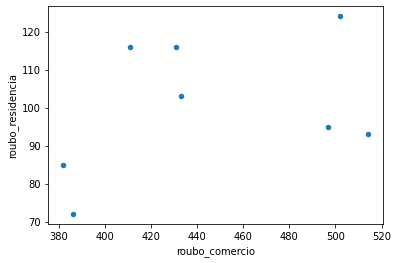

In [30]:
df19.plot.scatter("roubo_comercio","roubo_residencia");

### Analise comparativa 1991-2000-2012

  A estratificação das ocorrências por ano permite comparações adicionais do histórico de ocorrências. A|s observações sobre os resultados acima são apresentadas na conclusão final.  A análise a seguir é uma pequena demonstração das várias possbilidades de análise nas 55 variáveis apresentadas. Nesta análise será abordado, para cada ano, o montante de furtos em coletivos, o indíce de recuperação de veículos em relação ao furto e roubo de veículos, além da indentificação  do mês de maior e menor ocorrência de homicídio doloso. 

In [31]:
# CALCULANDO O PERCENTUAL DE CARROS RECUPERADOS EM RELAÇÃO AO TOTAL DE CARROS ROUBADOS E FURTADOS em 1991:
A91 = df91.roubo_veiculo.sum() 
B91 = df91.furto_veiculos.sum()
C91 = df91.recuperacao_veiculos.sum()
print('tot. veículos roubados =', A91)
print('tot. veículos furtados =', B91)
print('tot. veículos recuperados =', C91)
print('')
INDICE_RECUP91 = C91/(A91+B91)
print('Indice de veículos recuperados em 1991 =', INDICE_RECUP91)

tot. veículos roubados = 16452
tot. veículos furtados = 23979
tot. veículos recuperados = 9890

Indice de veículos recuperados em 1991 = 0.24461428112092207


In [32]:
# CALCULANDO O PERCENTUAL DE CARROS RECUPERADOS EM RELAÇÃO AO TOTAL DE CARROS ROUBADOS E FURTADOS em 2000:
A20 = df2000.roubo_veiculo.sum() 
B20 = df2000.furto_veiculos.sum()
C20 = df2000.recuperacao_veiculos.sum()
print('tot. veículos roubados =', A20)
print('tot. veículos furtados =', B20)
print('tot. veículos recuperados =', C20)
print('')
INDICE_RECUP2000 = C20/(A20+B20)
print('Indice de veículos recuperados em 2000 =', INDICE_RECUP2000)

tot. veículos roubados = 27728
tot. veículos furtados = 17760
tot. veículos recuperados = 21916

Indice de veículos recuperados em 2000 = 0.48179739711572284


In [33]:
# CALCULANDO O PERCENTUAL DE CARROS RECUPERADOS EM RELAÇÃO AO TOTAL DE CARROS ROUBADOS E FURTADOS em 2019:
A19 = df19.roubo_veiculo.sum() 
B19 = df19.furto_veiculos.sum()
C19 = df19.recuperacao_veiculos.sum()
print('tot. veículos roubados =', A19)
print('tot. veículos furtados =', B19)
print('tot. veículos recuperados =', C19)
print('')
INDICE_RECUP2019 = C19/(A19+B19)
print('Indice de veículos recuperados em 2019 =', INDICE_RECUP2019)

tot. veículos roubados = 28012
tot. veículos furtados = 10812
tot. veículos recuperados = 19387

Indice de veículos recuperados em 2019 = 0.499356068411292


In [34]:
# COMPARATIVO DOS REGISTROS DO ROUBOS EM COLETIVOS

RC1991 = df91.roubo_em_coletivo.sum()
RC2000 = df2000.roubo_em_coletivo.sum()
RC2019 = df19.roubo_em_coletivo.sum()
print(' Total de roubos em coletivos em 1991 = ', RC1991)
print(' Total de roubos em coletivos em 2000 = ', RC2000)
print(' Total de roubos em coletivos em 2019 =',RC2019)

 Total de roubos em coletivos em 1991 =  4249
 Total de roubos em coletivos em 2000 =  8305
 Total de roubos em coletivos em 2019 = 11136


In [35]:
max_hom_doloso91 = df91.hom_doloso.max()
min_hom_doloso91 = df91.hom_doloso.min()
#df[df.hom_doloso == 831]
print('Numero máximo de homicidios dolosos em 1991 =',max_hom_doloso91)
print('Numero mínimo de homicidios dolosos em 1991 =',min_hom_doloso91)

Numero máximo de homicidios dolosos em 1991 = 732
Numero mínimo de homicidios dolosos em 1991 = 542


In [36]:
df91[df91.hom_doloso == 732]

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3


In [37]:
max_hom_doloso2000= df2000.hom_doloso.max()
min_hom_doloso2000 = df2000.hom_doloso.min()
#df[df.hom_doloso == 831]
print('Numero máximo de homicidios dolosos em 2000 =',max_hom_doloso2000)
print('Numero mínimo de homicidios dolosos em 2000 =',min_hom_doloso2000)

Numero máximo de homicidios dolosos em 2000 = 577
Numero mínimo de homicidios dolosos em 2000 = 448


In [38]:
df2000[df2000.hom_doloso == 577]

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,5,577,7.0,13,30.0,193,5466,NaN,248.0,5466.0,438,94,2757,327,1607,819,14,NaN,0.0,NaN,NaN,NaN,1419,7475,1557,645,NaN,NaN,NaN,5231,7433,0.0,NaN,NaN,NaN,715,NaN,NaN,NaN,2189,NaN,NaN,NaN,NaN,3822.0,NaN,82,NaN,NaN,NaN,627,2426,2757,37301.0,3


In [39]:
max_hom_doloso19= df19.hom_doloso.max()
min_hom_doloso19 = df19.hom_doloso.min()
#df[df.hom_doloso == 831]
print('Numero máximo de homicidios dolosos em 2019 =',max_hom_doloso19)
print('Numero mínimo de homicidios dolosos em 2019 =',min_hom_doloso19)

Numero máximo de homicidios dolosos em 2019 = 386
Numero mínimo de homicidios dolosos em 2019 = 309


In [40]:
df19[df19.hom_doloso == 386]

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019,1,386,2.0,15,159.0,577,6423,459.0,157.0,2334.0,431,116,3785,740,7454,1328,2,7.0,2414.0,6.0,88.0,19.0,2365,18755,1415,2058,720.0,1581.0,168.0,7992,13934,0.0,129.0,6.0,3125.0,2021,792.0,1077.0,201.0,2810,2915.0,540.0,1266.0,236.0,5902.0,447.0,31,4.0,2.0,0.0,562,11196,3785,69609.0,3


# Conclusões

  A análise apresentada pode ainda ser mais enriquecida e isto devido a complexidade do tema e ao número variáveis que demandam mais estudos. Aliado a isso verificou-se muitos valores ausentes, que podem não terem sido coletados ou de fato não ocorreram, haja vista o roubo de bicicletas sendo a variável líder em falta de notificação. O tratamento dos dados requer grande manipulação e representa uma tarefa trabalhosa e claro: complexa.

  Algumas verificações merecem destaque:

  * considerando-se todo período de análise, 1991 até 2019, há significativa ausência de dados para diversas variáveis,
  * o índice geral de recuperação de veículos é próximo de 43%,
  * em janeiro de 1995 houve o maior número de homicídios em um mês com 831 homicídios,
  * observou-se no gráfico de dispersão que não relação entre  o número de roubos em residências e estabelecimentos comerciais.
  * através da análise do gráfico de linha apresentado para a variável `roubo em coletivo` mostra a tendência de aumento ao longo dos anos, muito embora seja conhecimento público que número de passageiros nos coletivos venha dimnuindo nos últimos anos. Tal análise poderá ser realizada com outras variáveis de interesse.
  * análise individualizada para os de 1991, 2000 e 2019 mostra que houve uma diminuição significativa nos valores ausentes, sendo que em 2019 não é apresentada nenhuma variável com valor ausente. Muito provavelmente tenha-se notabilizado a importância dos dados para a análise da segurança urbana. Nestes anos também verificou-se, através dos gráficos de dispersão elaborados, que não há relação entre o roubo em residências e estabelecimentos comerciais. Chama a atenção a redução do número de casos de homicídios dolosos.
    
   O cenário descrito acima, baseado em dados oficiais, não é um perfil exclusivo para o Rio de Janeiro, mas sim umretrato comum para os grandes centros urbanos, e fato é que o Rio de Janeiro continua lindo, como bem diz a música.

   <center><img alt="Rio de Janeiro" width="50%" src="https://magazine.zarpo.com.br/wp-content/uploads/2020/04/praia-de-copacabana_zarpo-1.png"></center>

 Segundo pesquisa booking.com (https://news.booking.com/so-paulo-e-rio-foram-a-cidades-brasileiras-mais-reservadas-em-2018/ ), a cidade do Rio de Janeiro é mais procuradas por turistas estrangeiros.





